In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tvs-loan-default/TVS.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

**Read Data**

In [3]:
df_temp=pd.read_csv("/kaggle/input/tvs-loan-default/TVS.csv",low_memory="false")
df_temp

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,...,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,...,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,...,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119523,119524,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,0,TIER 3,0
119524,119525,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,33000.0,NaN,NaN,3,1,0,TIER 3,1
119525,119526,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,0,TIER 3,0
119526,119527,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,31990.0,43600.0,NaN,13.0,0,0,0,TIER 1,0


In [4]:
import sklearn.feature_selection as fs
x=df_temp.iloc[:,0:31]
y=pd.DataFrame(df_temp["V32"])
x,y

(            V1  V2  V3    V4   V5      V6       V7    V8      V9  V10  ...  \
 0            1   0   0  24.0  0.0  2432.0  46500.0  24.0  1385.0   SC  ...   
 1            2   0   1  24.0  1.0  1495.0  28168.0  24.0  2496.0   MO  ...   
 2            3   0   0  26.0  0.0  1707.0  38900.0  30.0  1346.0   SC  ...   
 3            4   0   0  24.0  0.0  2128.0  42900.0  24.0  1375.0   SC  ...   
 4            5   0   0  27.0  0.0  1824.0  40900.0  30.0  4140.0   MC  ...   
 ...        ...  ..  ..   ...  ...     ...      ...   ...     ...  ...  ...   
 119523  119524   0   1   NaN  NaN     NaN      NaN   NaN     NaN  NaN  ...   
 119524  119525   0   0   NaN  NaN     NaN      NaN   NaN     NaN  NaN  ...   
 119525  119526   0   0   NaN  NaN     NaN      NaN   NaN     NaN  NaN  ...   
 119526  119527   0   1   NaN  NaN     NaN      NaN   NaN     NaN  NaN  ...   
 119527  119528   0   0   NaN  NaN     NaN      NaN   NaN     NaN  NaN  ...   
 
         V22  V23       V24      V25   V26   V27  

In [5]:
x=x.drop(["V1"],axis=1)
x

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31
0,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,0.0,...,0,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1
1,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,0.0,...,0,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1
2,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,0.0,...,0,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1
3,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,2.0,...,0,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1
4,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,0.0,...,0,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119523,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0,0,0,TIER 3
119524,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,33000.0,NaN,NaN,3,1,0,TIER 3
119525,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0,0,0,TIER 3
119526,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,31990.0,43600.0,NaN,13.0,0,0,0,TIER 1


<Axes: >

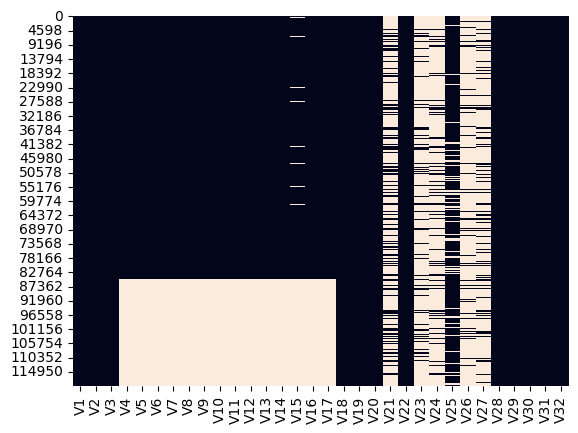

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df_temp.isnull(), cbar=False)

In [7]:
x.describe()

,V2,V3,V4,V5,V6,V7,V8,V9,V11,V12,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
count,119528.000000,119528.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,...,3.662600e+04,119528.0,1.928100e+04,1.902800e+04,104467.000000,13431.000000,20433.000000,119528.000000,119528.000000,119528.000000
mean,0.028378,0.473061,17.217148,0.690857,2325.701298,39338.081648,21.060048,3512.692233,0.643930,11.703803,...,2.742192e+05,0.0,4.302522e+05,1.766494e+05,41415.210047,46.980940,48.208976,1.076877,0.823991,0.344898
std,0.166052,0.859042,5.203209,1.091658,575.614365,11016.619745,5.698900,3754.675342,0.969123,3.980542,...,7.916241e+05,0.0,8.228143e+05,4.075618e+05,13044.008078,42.716225,41.713826,3.737882,3.172612,1.478180
min,0.000000,0.000000,2.000000,0.000000,681.000000,10000.000000,6.000000,1001.000000,0.000000,0.000000,...,1.000000e+00,0.0,9.900000e+01,1.000000e+00,10000.000000,4.000000,4.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,14.000000,0.000000,1895.000000,30000.000000,18.000000,1368.000000,0.000000,9.500000,...,4.190700e+04,0.0,4.490000e+04,3.394050e+04,31000.000000,20.000000,23.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,17.000000,0.000000,2320.000000,39700.000000,24.000000,2307.000000,0.000000,12.600000,...,9.500000e+04,0.0,1.100000e+05,8.800000e+04,42250.000000,31.000000,35.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,21.000000,1.000000,2689.000000,48000.000000,24.000000,3911.000000,1.000000,14.090000,...,3.000000e+05,0.0,4.920000e+05,2.000048e+05,49300.000000,52.000000,55.000000,0.000000,0.000000,0.000000
max,1.000000,12.000000,36.000000,29.000000,7840.000000,96000.000000,36.000000,21106.000000,6.000000,20.650000,...,1.000000e+08,0.0,2.022777e+07,3.000000e+07,700000.000000,252.000000,268.000000,314.000000,243.000000,96.000000


**Null Imputation**

In [8]:
x["V10"].mode()

0    SC
Name: V10, dtype: object

In [9]:
x["V14"]=x["V14"].fillna("Z")

In [10]:
x["V10"]=x["V10"].fillna("SC")

In [11]:
list_V10=x["V10"].unique()
sorted(list_V10)

['MC', 'MO', 'RETOP', 'SC', 'TL']

In [12]:
list_V14=x["V14"].unique()
sorted(list_V14)

['HOUSEWIFE', 'PENS', 'SAL', 'SELF', 'STUDENT', 'Z']

In [13]:
x["V15"]=x["V15"].fillna("NO")

In [14]:
list_V15=x["V15"].unique()
sorted(list_V15)

['NO', 'OWENED BY OFFICE', 'OWNED', 'RENT']

In [15]:
x=x.drop(['V16'],axis=1)

In [16]:
x["V17"]=x["V17"].fillna(x["V17"].mean())

In [17]:
x["V21"]=x["V21"].fillna(0)

In [18]:
x=x.drop(["V21","V22","V23","V24","V26","V27"],axis=1)

In [19]:
x["V25"]=x["V25"].fillna(x["V25"].mean())

<Axes: >

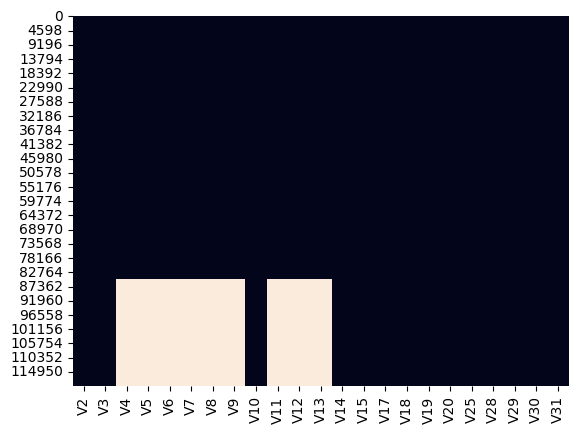

In [20]:
sns.heatmap(x.isnull(), cbar=False)

**Label Encoding**

In [21]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
x["V31"]=label_encoder.fit_transform(x["V31"]) #Tier1=0,Tier2=1,Tier3=2
x["V10"]=label_encoder.fit_transform(x["V10"]) #Motorcycle-0,Moped-1,Retop-2,Scooter-3,Tl-4
x["V13"]=label_encoder.fit_transform(x["V13"]) #Female-0,Male-1
x["V14"]=label_encoder.fit_transform(x["V14"]) #Houswife-0,Pension-1,Salaried-2,Self-3,Student-4,Unemployed-5
x["V15"]=label_encoder.fit_transform(x["V15"]) #Others-0,Office-Owned-1,Owned-2,Rent-3


In [22]:
x["V4"]=x["V4"].fillna(x["V4"].mean())
x["V5"]=x["V5"].fillna(x["V5"].mean())
x["V6"]=x["V6"].fillna(x["V6"].mean())
x["V7"]=x["V7"].fillna(x["V7"].mean())
x["V8"]=x["V8"].fillna(x["V8"].mean())
x["V9"]=x["V9"].fillna(x["V9"].mean())
x["V11"]=x["V11"].fillna(x["V11"].mean())
x["V12"]=x["V12"].fillna(x["V12"].mean())
x["V13"]=x["V13"].fillna(x["V13"].mean())

In [23]:
dfvis= x.join(y)
dfvis

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V17,V18,V19,V20,V25,V28,V29,V30,V31,V32
0,0,0,24.000000,0.000000,2432.000000,46500.000000,24.000000,1385.000000,3,0.00000,...,40.000000,1,1,0,46500.000000,0,0,0,0,0
1,0,1,24.000000,1.000000,1495.000000,28168.000000,24.000000,2496.000000,1,0.00000,...,47.000000,1,1,0,28168.000000,0,0,0,0,0
2,0,0,26.000000,0.000000,1707.000000,38900.000000,30.000000,1346.000000,3,0.00000,...,31.000000,9,6,3,38900.000000,31,31,16,0,0
3,0,0,24.000000,0.000000,2128.000000,42900.000000,24.000000,1375.000000,3,2.00000,...,24.000000,1,1,0,42900.000000,0,0,0,0,0
4,0,0,27.000000,0.000000,1824.000000,40900.000000,30.000000,4140.000000,0,0.00000,...,30.000000,1,1,0,40900.000000,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119523,0,1,17.217148,0.690857,2325.701298,39338.081648,21.060048,3512.692233,3,0.64393,...,37.003645,0,0,0,41415.210047,0,0,0,2,0
119524,0,0,17.217148,0.690857,2325.701298,39338.081648,21.060048,3512.692233,3,0.64393,...,37.003645,1,1,0,33000.000000,3,1,0,2,1
119525,0,0,17.217148,0.690857,2325.701298,39338.081648,21.060048,3512.692233,3,0.64393,...,37.003645,0,0,0,41415.210047,0,0,0,2,0
119526,0,1,17.217148,0.690857,2325.701298,39338.081648,21.060048,3512.692233,3,0.64393,...,37.003645,4,1,2,43600.000000,0,0,0,0,0


**Correlation**

<Axes: >

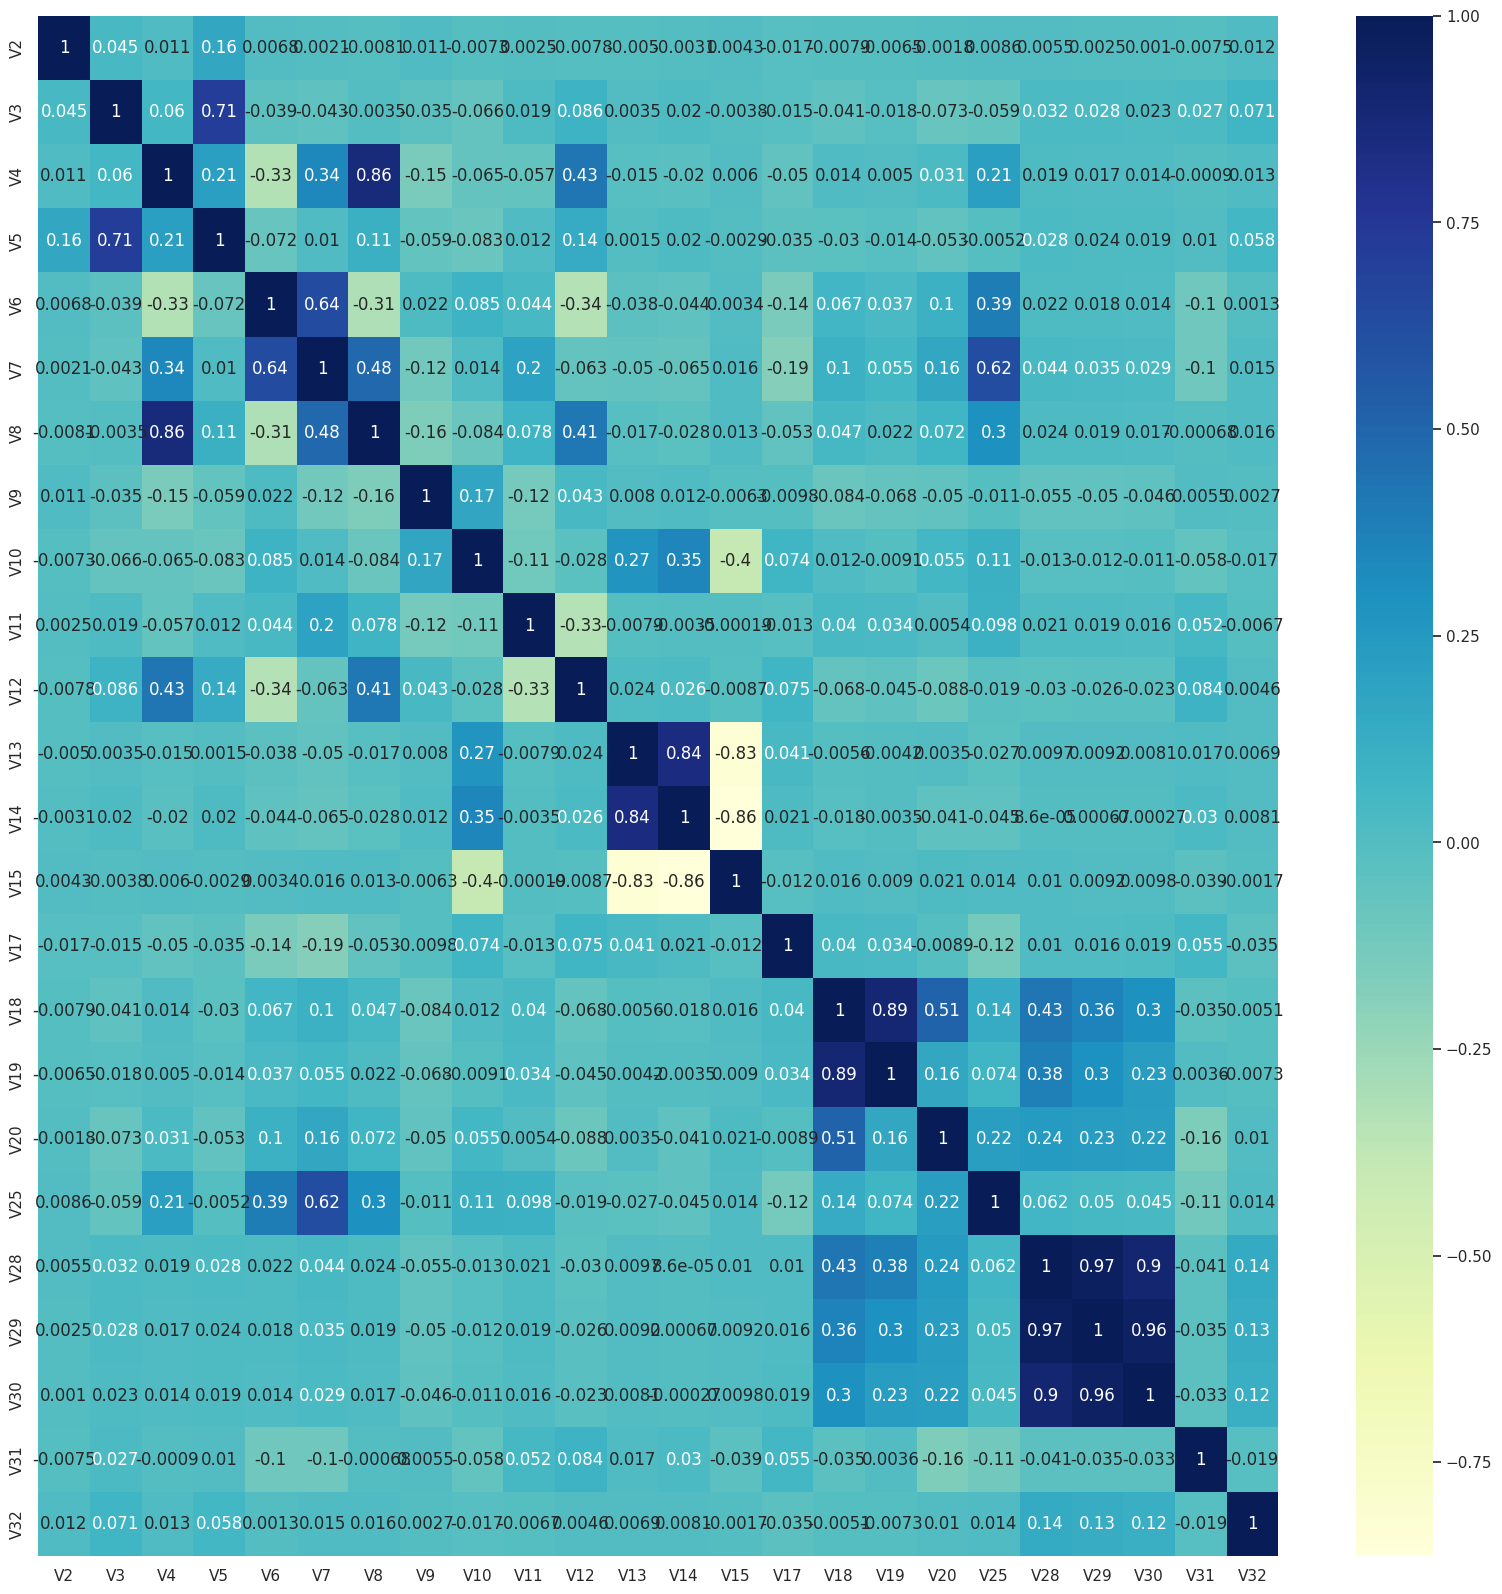

In [24]:
sns.set (rc = {'figure.figsize':(20, 20)})
dataplot = sns.heatmap(dfvis.corr(), cmap="YlGnBu", annot=True)
dataplot

In [25]:
from sklearn.model_selection import train_test_split
x=x.loc[:,["V3","V5","V17","V28","V29","V30"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
uni = SelectKBest(score_func = f_classif, k = 6)
fit = uni.fit(x, y)
features=x.columns[fit.get_support(indices=True)].tolist()
features

['V3', 'V5', 'V17', 'V28', 'V29', 'V30']

**Lazy-Predict**

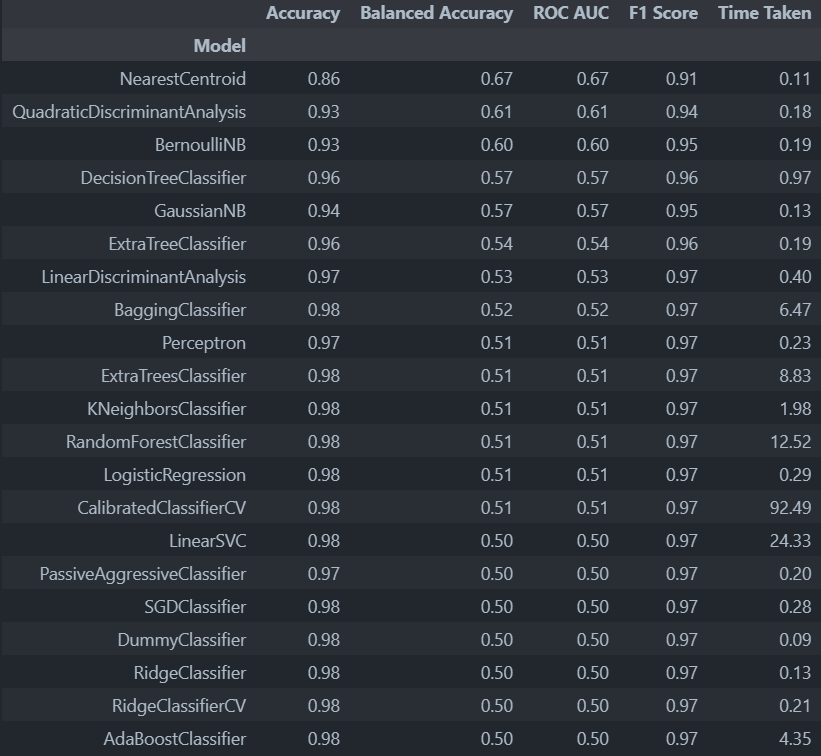

**Quadratic Discriminant Analysis**

In [27]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
quad = QuadraticDiscriminantAnalysis()
quad.fit(x_train, y_train)

QuadraticDiscriminantAnalysis()

In [28]:
from sklearn.metrics import accuracy_score  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
y_pred1=quad.predict(x_test)
accuracy=accuracy_score(y_test, y_pred1)
roc_auc=roc_auc_score(y_test,y_pred1)
f1=f1_score(y_test, y_pred1,average='weighted')
accuracy,roc_auc,f1

(0.9407680080314565, 0.6016177982571005, 0.9516251918779538)

**Random Forest Classifier and Hyperparameter Tuning**

In [29]:
from sklearn.ensemble import RandomForestClassifier  
scores =[]
for i in range(1,502,25):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(x_train, y_train)
    y_pred_temp_estimators = rfc.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred_temp_estimators))
    print("Accuracy with estimators = "+str(i)+" is = "+str(accuracy_score(y_pred_temp_estimators,y_test)))

Accuracy with estimators = 1 is = 0.9697983769764913
Accuracy with estimators = 26 is = 0.9754036643520455
Accuracy with estimators = 51 is = 0.9748180373128085
Accuracy with estimators = 76 is = 0.9754454948548481
Accuracy with estimators = 101 is = 0.9755291558604534
Accuracy with estimators = 126 is = 0.9749853593240191
Accuracy with estimators = 151 is = 0.9754454948548481
Accuracy with estimators = 176 is = 0.9752363423408349
Accuracy with estimators = 201 is = 0.9754454948548481
Accuracy with estimators = 226 is = 0.9754454948548481
Accuracy with estimators = 251 is = 0.9755291558604534
Accuracy with estimators = 276 is = 0.9751945118380323
Accuracy with estimators = 301 is = 0.9754036643520455
Accuracy with estimators = 326 is = 0.9753618338492429
Accuracy with estimators = 351 is = 0.9754454948548481
Accuracy with estimators = 376 is = 0.9755709863632561
Accuracy with estimators = 401 is = 0.9754036643520455
Accuracy with estimators = 426 is = 0.9753618338492429
Accuracy with e

Text(0, 0.5, 'Testing Accuracy')

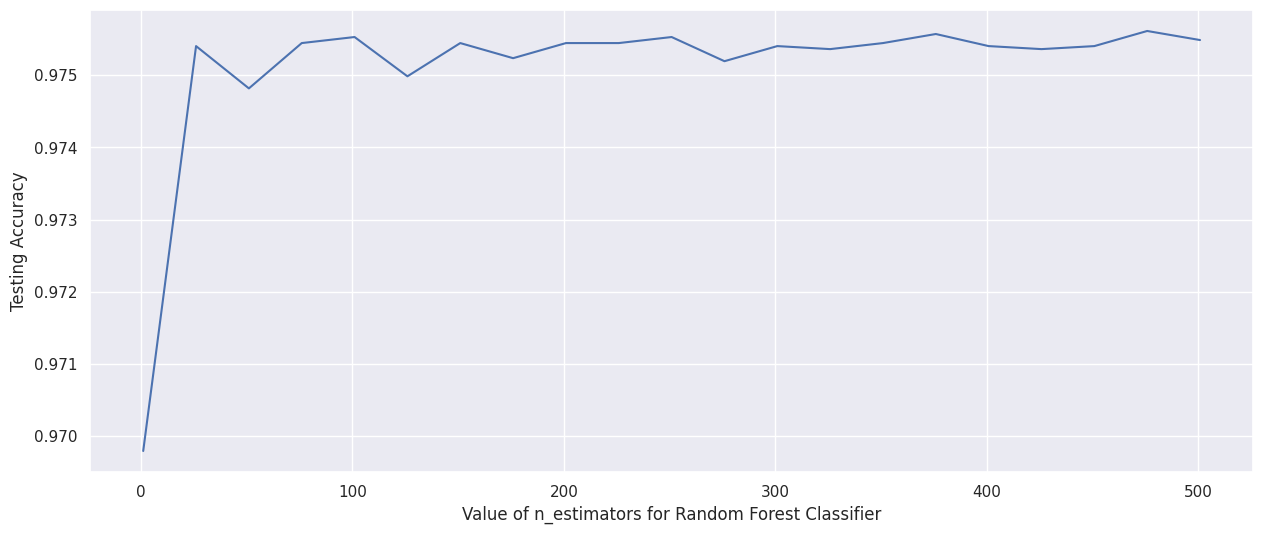

In [30]:
sns.set (rc = {'figure.figsize':(15, 6)})
plt.plot(range(1,502,25), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [31]:
scores2=[]
for i in range(1,11):
    rfc = RandomForestClassifier(n_estimators=425,max_depth=i)
    rfc.fit(x_train, y_train)
    y_pred_temp_estimators2 = rfc.predict(x_test)
    scores2.append(accuracy_score(y_test, y_pred_temp_estimators2))
    print("Accuracy with estimators = "+str(i)+" is = "+str(accuracy_score(y_pred_temp_estimators2,y_test)))

Accuracy with estimators = 1 is = 0.9783317995482306
Accuracy with estimators = 2 is = 0.9783317995482306
Accuracy with estimators = 3 is = 0.9783317995482306
Accuracy with estimators = 4 is = 0.9783317995482306
Accuracy with estimators = 5 is = 0.9783317995482306
Accuracy with estimators = 6 is = 0.9783317995482306
Accuracy with estimators = 7 is = 0.9783317995482306
Accuracy with estimators = 8 is = 0.9783317995482306
Accuracy with estimators = 9 is = 0.9783317995482306
Accuracy with estimators = 10 is = 0.978289969045428


Text(0, 0.5, 'Testing Accuracy')

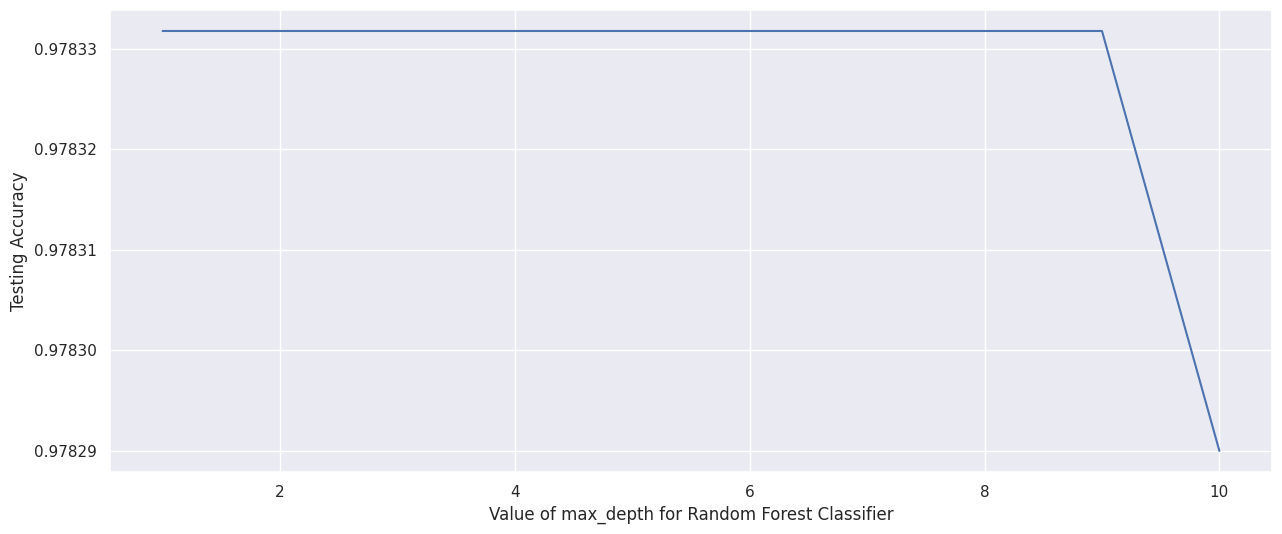

In [32]:
plt.plot(range(1,11), scores2)
plt.xlabel('Value of max_depth for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [33]:
classifier_rfc=RandomForestClassifier(n_estimators=475,max_depth=7)
classifier_rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=475)

In [34]:
y_pred_rfc=classifier_rfc.predict(x_test)
rfc_acc=accuracy_score(y_pred_rfc,y_test)
rfc_acc

0.9783317995482306

**Dump**

In [35]:
import pickle
pickle.dump(classifier_rfc,open("RandomForest_6Params.pkl","wb"))
pickle.dump(quad,open("QuadraticDiscriminant_6Params.pkl","wb"))